# Assignment - 07 (Clustering)

## 1. Airlines
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
Draw the inferences from the clusters obtained.

Data Description:

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # to handle the dataframe
xlsx = pd.ExcelFile("/content/EastWestAirlines.xlsx")
df = pd.read_excel(xlsx,'data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [2]:
df1 = pd.read_excel(xlsx, 'Description')
df1.head()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


#### EDA

In [3]:
# Check data type and null values exists or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
# no. of columns in dataset
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [6]:
# No Null values
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
#print(df["ID#"].unique())
#print(df["Balance"].unique())
#print(df["Qual_miles"].unique())
#print(df["cc1_miles"].unique())
#print(df["cc2_miles"].unique())
#print(df["cc3_miles"].unique())
#print(df["Bonus_miles"].unique())
#print(df["Bonus_trans"].unique())
#print(df["Flight_miles_12mo"].unique())
#print(df["Flight_trans_12"].unique())
#print(df["Days_since_enroll"].unique())
df["Award?"].unique()

array([0, 1])

In [8]:
# Rows and columns in dataset
df.shape

(3999, 12)

In [9]:
# to check if duplicate columns are there in dataset
df[df.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [10]:
# Correlation between columns
df.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


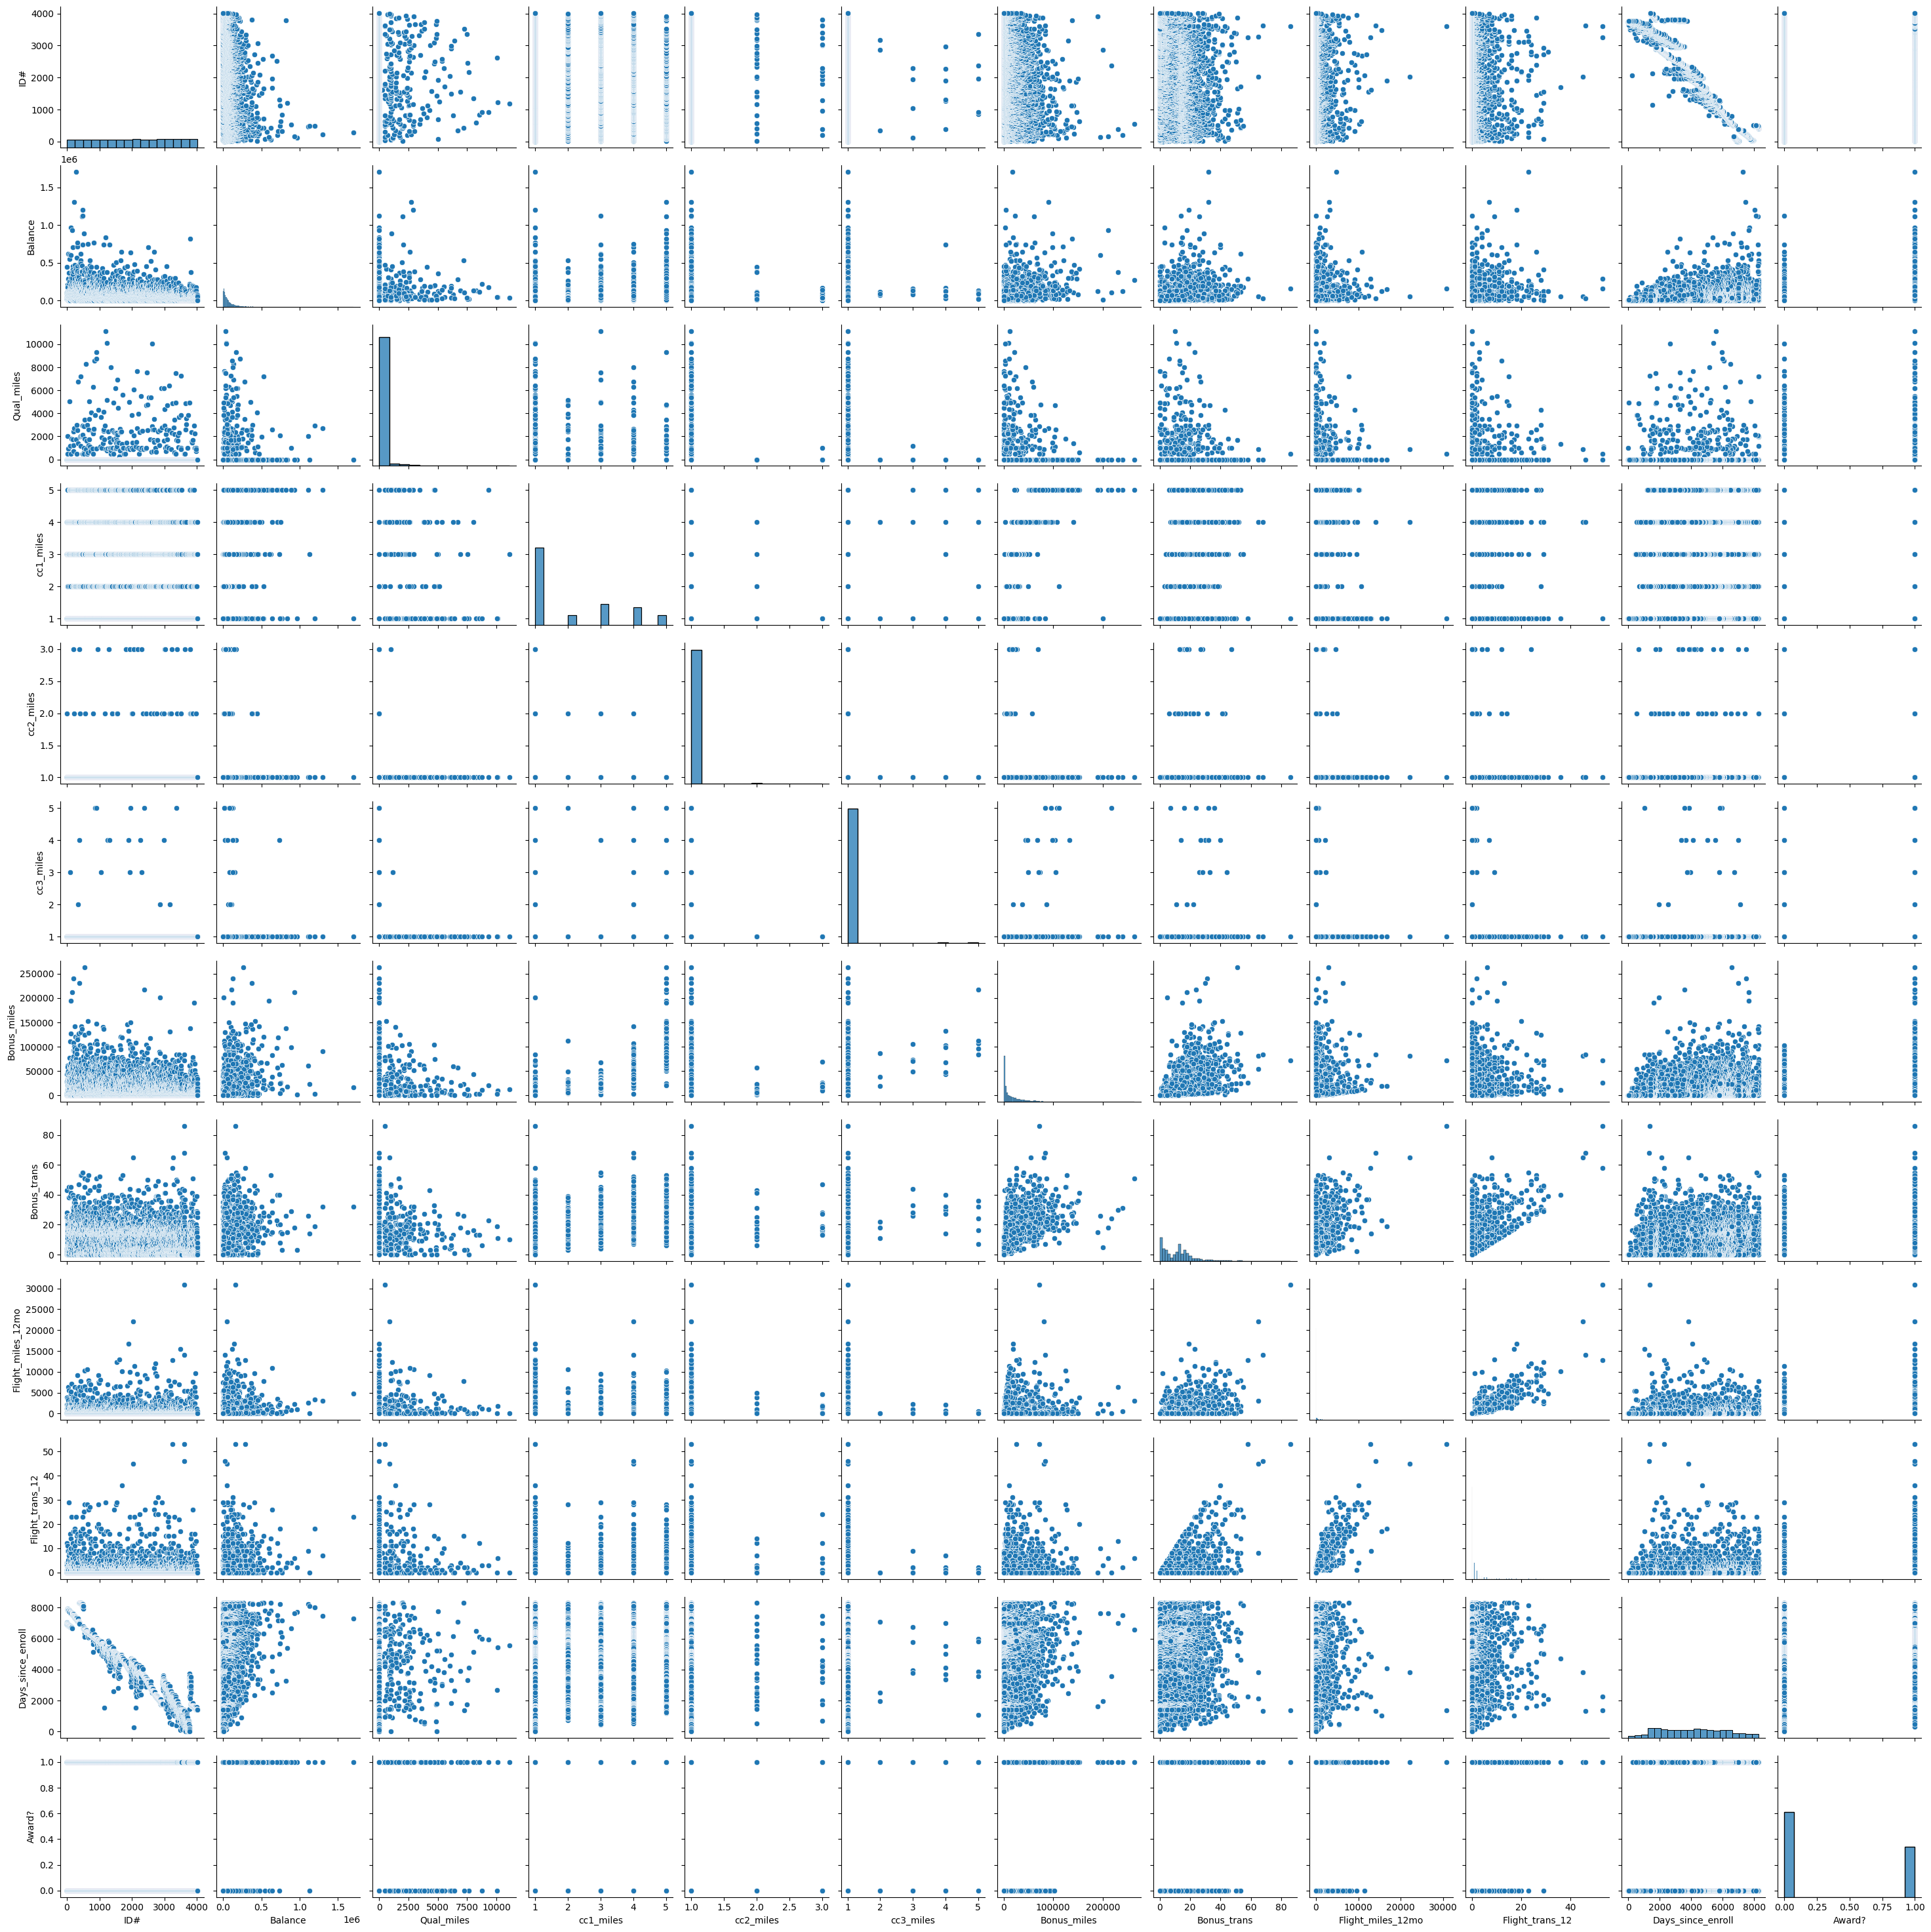

In [11]:
import seaborn as sns # For Visualization
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

#### Hierarchical Clustering

In [12]:
# importing clusters libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [13]:
# Normalization Function
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return(x)

In [14]:
# Normalize data frame (Considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


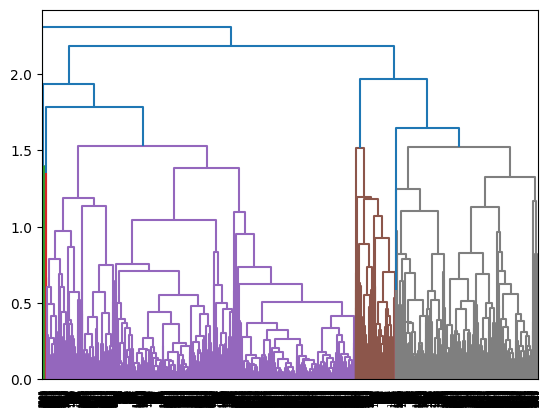

In [15]:
# Create Dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'complete'))

In [16]:
# Create Clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

In [17]:
# model fitting on dataset
hc.fit(df_norm)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [18]:
# Save cluster for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, ..., 2, 0, 0])

In [19]:
df['h_clusterid'] = y_hc
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [20]:
df1 = df.sort_values("h_clusterid")
df1.iloc[:,[0,-1]]

,ID#,h_clusterid
0,1,0
2485,2504,0
2487,2506,0
2488,2507,0
2491,2510,0
...,...,...
940,951,4
3959,3982,4
3779,3802,4
1389,1403,4


In [21]:
# extracting features from dataset
x = df.iloc[:,-1]
y = df1.iloc[:, -2]

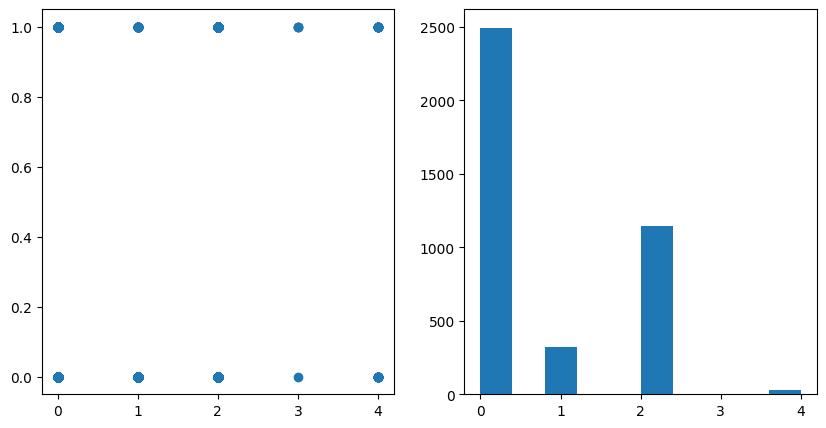

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
ax[0].scatter(x, y)
ax[1].hist(x)
plt.show()

#### K_Means Clustering

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [24]:
# Standardization of data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
scaled_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -7.30291870e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -7.30291870e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -7.30291870e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  1.39443508e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -7.30291870e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -7.30291870e-01]])

In [25]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(scaled_df)
kmeans.inertia_

29398.010583464245

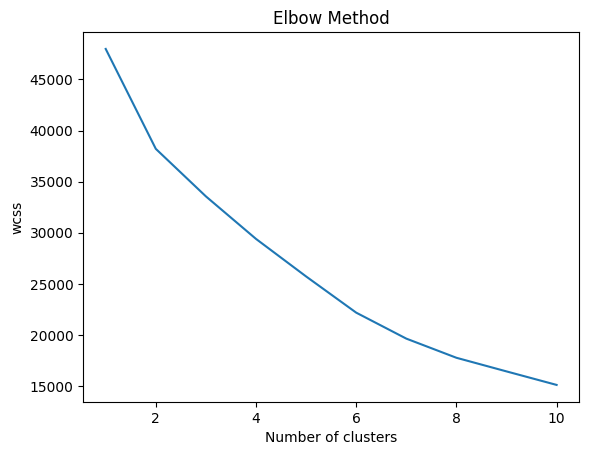

In [26]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [27]:
wcss

[47988.00000000003,
 38211.12466951977,
 33558.875138087096,
 29398.010583464245,
 25724.311049571985,
 22182.65741084757,
 19641.317239385542,
 17767.34398193525,
 16433.351051217418,
 15110.871518427073]

In [28]:
# Build Cluster Algorithm
cluster_new = KMeans(4, random_state = 42)
cluster_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [29]:
cluster_new.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [30]:
# Assign Cluster to the dataset
df['clusterid_new'] = cluster_new.labels_
cluster_new.cluster_centers_  # these are standardized value

array([[-0.28296685, -0.07459285, -0.51140363, -0.09824189, -0.060374  ,
        -0.49464343, -0.43536104, -0.21048576, -0.23150553, -0.22077758,
        -0.7669193 , -0.73029187],
       [-0.11898452,  0.01796365, -0.02570087,  0.24828443, -0.06276658,
        -0.09264573,  0.04829277, -0.04252018, -0.03640473,  0.061751  ,
         1.25394621,  1.45596192],
       [ 1.28268449,  0.979096  ,  0.16884431,  0.09952771, -0.06276658,
         0.72587331,  1.80724874,  3.84281759,  4.1336012 ,  0.2711156 ,
         0.98649052,  0.83611267],
       [ 0.80784264,  0.01015591,  1.60351768, -0.08835341,  0.29618383,
         1.54097507,  0.92625342, -0.04637238, -0.04807989,  0.54243493,
         0.30326531, -0.0866702 ]])

In [31]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2256.573097,45088.720691,86.411957,1.355441,1.000000,1.000467,5200.222326,7.421298,165.368519,0.495563,3662.680990,0.000000,0.000000
1,1,1960.337512,61592.021215,157.858245,2.026037,1.051109,1.000000,14930.500482,12.080039,400.525554,1.236258,4246.302797,0.975892,2.057859
2,2,1743.043796,202848.547445,901.510949,2.291971,1.029197,1.000000,34673.197080,28.956204,5840.131387,17.051095,4678.379562,0.846715,1.474453
3,3,1395.135965,155168.978070,152.192982,4.267544,1.001462,1.070175,54379.250000,20.486842,395.125731,1.190058,5239.714912,0.516082,0.603801


In [32]:
df[df['clusterid_new'] == 3]
#df[df['clusterid_new'] == 0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0,3
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1,3
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1,3
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,1,3
3886,3909,84979,0,4,1,1,36702,16,0,0,1600,0,0,3
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0,0,3
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,0,3


#### DBSCAN : Density Base Spatial Clustering of Applications with Noise

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [35]:
array = df.values

In [36]:
st_scaler = StandardScaler()
X = st_scaler.fit_transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -7.30291870e-01, -7.58724978e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -7.30291870e-01, -7.58724978e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -7.30291870e-01, -7.58724978e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
         1.30391816e+00,  1.39443508e+00,  1.43487685e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -7.30291870e-01, -7.58724978e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -7.30291870e-01, -7.58724978e-01]])

In [37]:
dbscan = DBSCAN(eps = 5 , min_samples = 6)
dbscan.fit(X)

DBSCAN(eps=5, min_samples=6)

In [38]:
# Noisy Samples are given the label: -1
print(dbscan.labels_)

[0 0 0 ... 0 0 0]


In [39]:
cl = pd.DataFrame(dbscan.labels_, columns = ['clusters'])

In [40]:
cl

,clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [41]:
clustered = pd.concat([df,cl], axis =1)
clustered

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0,0


In [42]:
# -1 Shows outlier / extreme values for the dataset
clustered[clustered['clusters'] == -1].head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,clusters
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,0,3,-1
220,224,1302051,2706,5,1,1,90653,32,3050,7,7467,1,1,2,-1
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,2,2,-1
343,348,112501,0,1,1,2,19140,11,0,0,7101,0,0,0,-1
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,1,3,-1


In [43]:
clustered.mean()

ID#                   2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
h_clusterid              0.687422
clusterid_new            0.840960
clusters                 0.010003
dtype: float64

In [44]:
p = clustered.iloc[:,-1]
q = clustered.iloc[:,-2]
r = clustered.iloc[:,-3]
#print(p)
#print(q)
#print(r)

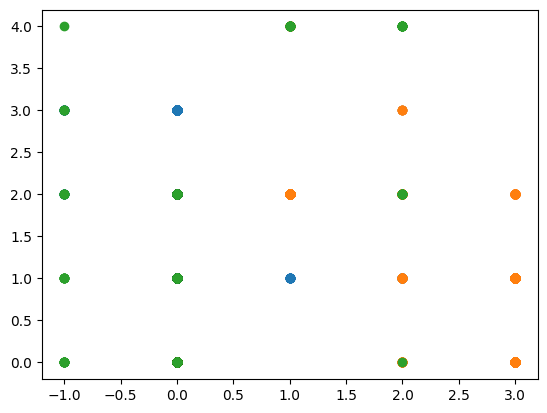

In [46]:
plt.scatter(p,q)
plt.scatter(q,r)
plt.scatter(p,r)
plt.show()

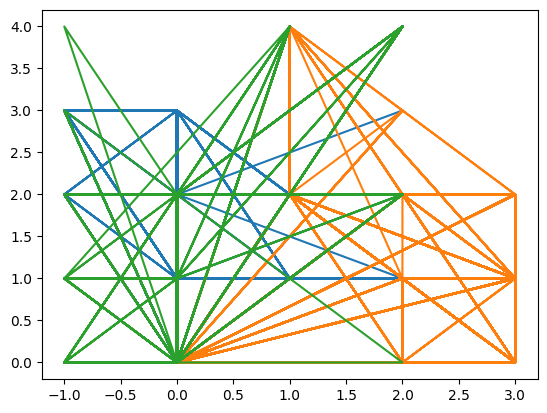

In [47]:
plt.plot(p,q)
plt.plot(q,r)
plt.plot(p,r)
plt.show()

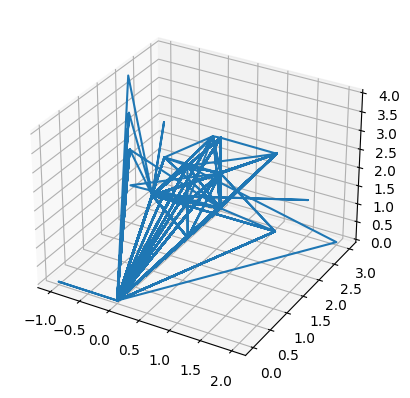

In [48]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot(p,q,r)
plt.show()

### Inferences:

###### In clusters column there is outiers/extreme values exists in the given data shows with -1.

## 2. Crime Data

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [49]:
import pandas as pd
df = pd.read_csv("/content/crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#### EDA

In [50]:
# no. & labels of columns
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [51]:
# Renaming the column
df.columns = ["Name", "Murder", "Assault", "UrbanPop", "Rape"]

In [52]:
df.columns

Index(['Name', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [53]:
# datatype and no. of null values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [54]:
# Rows and Column in the dataset
df.shape

(50, 5)

In [ ]:
df.describe()

In [56]:
# To find the total no. of null values in columns
df.isna().sum()

Name        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [57]:
df = df.iloc[:,1:]

In [58]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df['Rape'] = LE.fit_transform(df['Rape'])

In [59]:
#df['Murder'].unique()
#df['Assault'].unique()
#df['UrbanPop'].unique()
df['Rape'].unique()

array([26, 46, 40, 21, 45, 44,  6, 13, 41, 33, 23, 10, 31, 25,  8, 19, 15,
       28,  1, 37, 43, 11, 18, 38, 16, 17, 47,  4, 20, 42, 34, 14,  0, 27,
       22, 39,  2, 29,  9, 36, 32, 30,  7, 24, 35,  3,  5, 12])

In [60]:
df[df.duplicated()]

,Murder,Assault,UrbanPop,Rape


In [61]:
# To check correlation
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.625828
Assault,0.801873,1.000000,0.258872,0.688542
UrbanPop,0.069573,0.258872,1.000000,0.438389
Rape,0.625828,0.688542,0.438389,1.000000


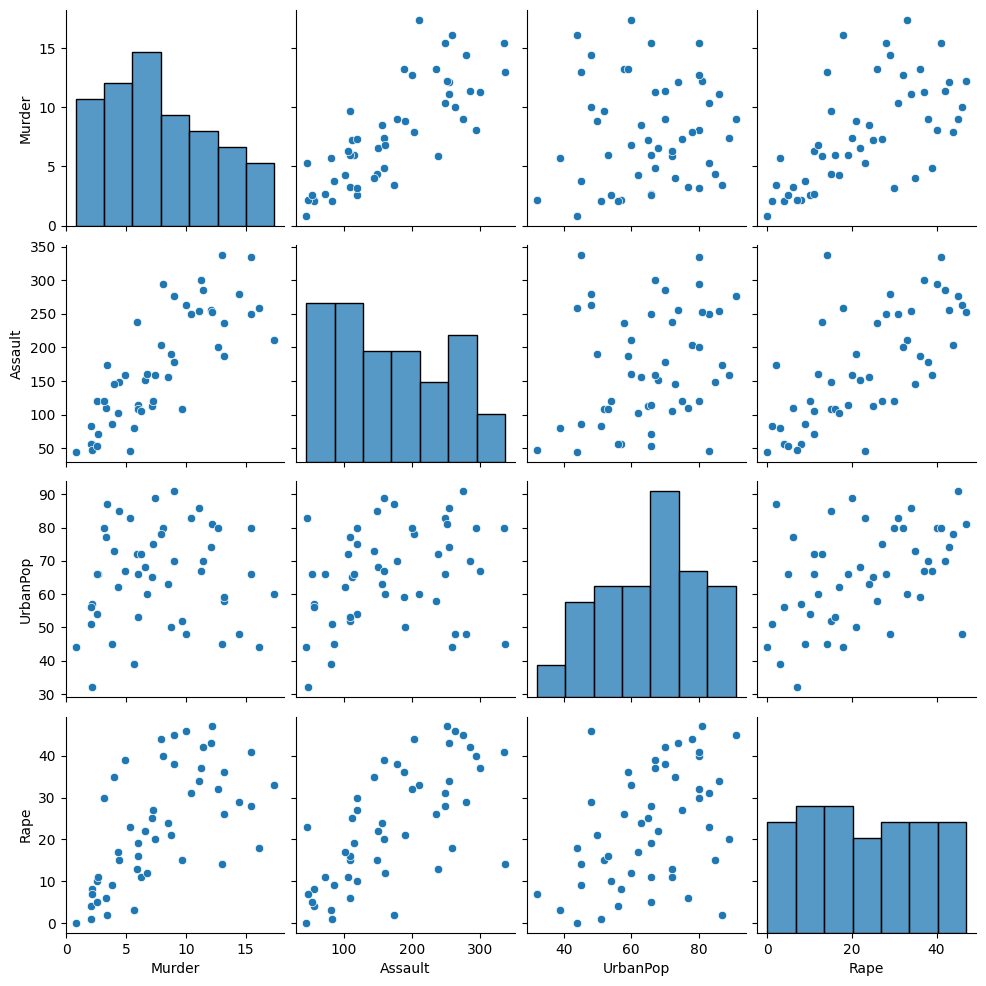

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

#### Hierarchical Clustering

In [63]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [64]:
# Normalization Function
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return(x)

In [65]:
# Normalize data frame (Considering the numerical part of data)
df_norm = norm_func(df.iloc[:,0:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.553191
1,0.554217,0.746575,0.271186,0.978723
2,0.439759,0.852740,0.813559,0.851064
3,0.481928,0.496575,0.305085,0.446809
4,0.493976,0.791096,1.000000,0.957447


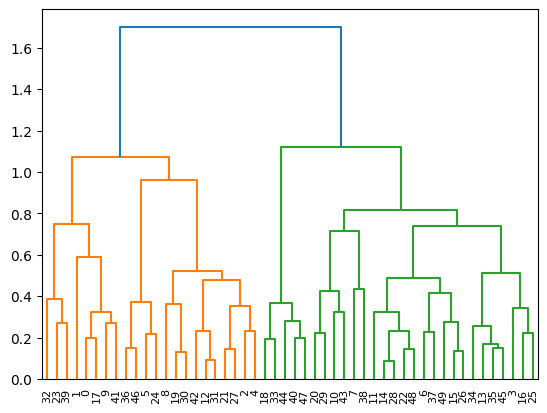

In [66]:
# Create Dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'complete'))

In [67]:
# Create Clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

In [68]:
hc.fit(df_norm)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [69]:
# Save cluster for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([1, 1, 3, 0, 3, 4, 0, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 1, 2, 3, 0, 3,
       0, 1, 4, 0, 0, 3, 0, 0, 3, 3, 1, 2, 0, 0, 4, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 4, 2, 0, 0])

In [70]:
# creating cluster ID
df['h_clusterid'] = y_hc

In [71]:
df1 = df.sort_values("h_clusterid")
df1.iloc[:,[0,-1]].head()

,Murder,h_clusterid
49,6.8,0
26,4.3,0
22,2.7,0
28,2.1,0
20,4.4,0


In [72]:
df['h_clusterid'].unique()

array([1, 3, 0, 4, 2])

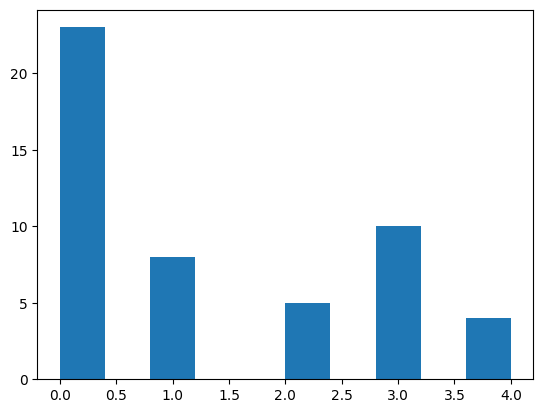

In [73]:
import matplotlib.pyplot as plt
plt.hist(df['h_clusterid'])
plt.show()

#### K_Means Clustering

In [74]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [75]:
#standardized Dataset using scale
array = df.values

In [76]:
#standardized Dataset using scale
array = df.values

In [77]:
from sklearn.preprocessing import scale
scaled = scale(array)
scaled

array([[ 1.25517927,  0.79078716, -0.52619514,  0.21260493, -0.19791075],
       [ 0.51301858,  1.11805959, -1.22406668,  1.66880306, -0.19791075],
       [ 0.07236067,  1.49381682,  1.00912225,  1.23194362,  1.21573747],
       [ 0.23470832,  0.23321191, -1.08449238, -0.15144461, -0.90473486],
       [ 0.28109336,  1.2756352 ,  1.77678094,  1.59599315,  1.21573747],
       [ 0.02597562,  0.40290872,  0.86954794,  1.52318324,  1.92256157],
       [-1.04088037, -0.73648418,  0.79976079, -1.2435932 , -0.90473486],
       [-0.43787481,  0.81502956,  0.45082502, -0.73392386, -0.90473486],
       [ 1.76541475,  1.99078607,  1.00912225,  1.30475352,  1.21573747],
       [ 2.22926518,  0.48775713, -0.38662083,  0.72227427, -0.19791075],
       [-0.57702994, -1.51224105,  1.21848371, -0.00582479, -0.90473486],
       [-1.20322802, -0.61527217, -0.80534376, -0.95235358, -0.90473486],
       [ 0.60578867,  0.94836277,  1.21848371,  0.57665446,  1.21573747],
       [-0.13637203, -0.70012057, -0.0

In [78]:
# Standardization of data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
scaled_df

array([[ 0.79078716, -0.52619514,  0.21260493, -0.19791075],
       [ 1.11805959, -1.22406668,  1.66880306, -0.19791075],
       [ 1.49381682,  1.00912225,  1.23194362,  1.21573747],
       [ 0.23321191, -1.08449238, -0.15144461, -0.90473486],
       [ 1.2756352 ,  1.77678094,  1.59599315,  1.21573747],
       [ 0.40290872,  0.86954794,  1.52318324,  1.92256157],
       [-0.73648418,  0.79976079, -1.2435932 , -0.90473486],
       [ 0.81502956,  0.45082502, -0.73392386, -0.90473486],
       [ 1.99078607,  1.00912225,  1.30475352,  1.21573747],
       [ 0.48775713, -0.38662083,  0.72227427, -0.19791075],
       [-1.51224105,  1.21848371, -0.00582479, -0.90473486],
       [-0.61527217, -0.80534376, -0.95235358, -0.90473486],
       [ 0.94836277,  1.21848371,  0.57665446,  1.21573747],
       [-0.70012057, -0.03768506,  0.13979502, -0.90473486],
       [-1.39102904, -0.5959823 , -1.09797339, -0.90473486],
       [-0.67587817,  0.03210209, -0.29706442, -0.90473486],
       [-0.74860538, -0.

In [79]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(scaled_df)
kmeans.inertia_

49.851433985840856

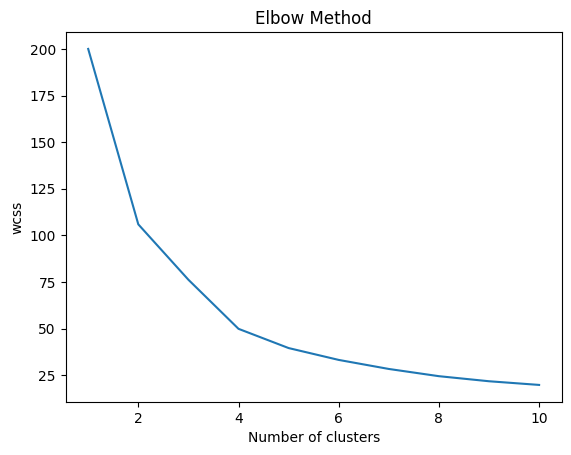

In [80]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [81]:
wcss

[200.0,
 105.90447880716354,
 76.1834868377438,
 49.851433985840856,
 39.53074532743696,
 33.171096458320804,
 28.321193926881833,
 24.444292555891366,
 21.72628921070004,
 19.756412368152954]

In [82]:
# Build Cluster Algorithm
cluster_new = KMeans(4, random_state = 42)
cluster_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [83]:
cluster_new.labels_

array([1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       0, 1, 2, 3, 0, 2, 3, 0, 2, 2, 1, 3, 0, 0, 2, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 2, 3, 0, 0], dtype=int32)

In [84]:
# Assign Cluster to the dataset
df['clusterid_new'] = cluster_new.labels_
cluster_new.cluster_centers_  # these are standardized value

array([[-0.54040592,  0.50008654, -0.47266478, -0.90473486],
       [ 0.90930557, -0.86737678,  0.35013475, -0.27644676],
       [ 0.86264856,  0.80973038,  1.16953513,  1.41768721],
       [-1.10739293, -1.20313054, -1.14894032, -0.19791075]])

In [85]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,5.364706,126.176471,72.705882,16.588235,0.000000
1,1,13.500000,245.777778,53.111111,27.888889,0.888889
2,2,9.964286,241.928571,77.142857,39.142857,3.285714
3,3,3.720000,79.400000,48.300000,7.300000,1.000000


In [86]:
df[df['clusterid_new'] == 3]
#df[df['clusterid_new'] == 0]

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
11,2.6,120,54,10,0,3
14,2.2,56,57,8,0,3
16,9.7,109,52,15,0,3
18,2.1,83,51,1,2,3
25,6.0,109,53,16,0,3
28,2.1,57,56,4,0,3
33,0.8,45,44,0,2,3
40,3.8,86,45,9,2,3
44,2.2,48,32,7,2,3
47,5.7,81,39,3,2,3


#### DBSCAN : Density Base Spatial Clustering of Applications with Noise

In [87]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [88]:
array = df.values

In [89]:
st_scaler = StandardScaler()
X = st_scaler.fit_transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514,  0.21260493, -0.19791075,
        -0.29769636],
       [ 0.51301858,  1.11805959, -1.22406668,  1.66880306, -0.19791075,
        -0.29769636],
       [ 0.07236067,  1.49381682,  1.00912225,  1.23194362,  1.21573747,
         0.57788117],
       [ 0.23470832,  0.23321191, -1.08449238, -0.15144461, -0.90473486,
        -0.29769636],
       [ 0.28109336,  1.2756352 ,  1.77678094,  1.59599315,  1.21573747,
         0.57788117],
       [ 0.02597562,  0.40290872,  0.86954794,  1.52318324,  1.92256157,
         0.57788117],
       [-1.04088037, -0.73648418,  0.79976079, -1.2435932 , -0.90473486,
        -1.17327388],
       [-0.43787481,  0.81502956,  0.45082502, -0.73392386, -0.90473486,
        -1.17327388],
       [ 1.76541475,  1.99078607,  1.00912225,  1.30475352,  1.21573747,
         0.57788117],
       [ 2.22926518,  0.48775713, -0.38662083,  0.72227427, -0.19791075,
        -0.29769636],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [90]:
dbscan = DBSCAN(eps = 5 , min_samples = 6)
dbscan.fit(X)

DBSCAN(eps=5, min_samples=6)

In [91]:
# Noisy Samples are given the label: -1
print(dbscan.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [92]:
cl = pd.DataFrame(dbscan.labels_, columns = ['clusters'])

In [93]:
cl

,clusters
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [94]:
clustered = pd.concat([df,cl], axis =1)
clustered

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,clusters
0,13.2,236,58,26,1,1,0
1,10.0,263,48,46,1,1,0
2,8.1,294,80,40,3,2,0
3,8.8,190,50,21,0,1,0
4,9.0,276,91,45,3,2,0
5,7.9,204,78,44,4,2,0
6,3.3,110,77,6,0,0,0
7,5.9,238,72,13,0,0,0
8,15.4,335,80,41,3,2,0
9,17.4,211,60,33,1,1,0


In [95]:
# -1 Shows outlier / extreme values for the dataset
clustered[clustered['clusters'] == -1].head()

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,clusters


In [96]:
clustered.mean()

Murder             7.788
Assault          170.760
UrbanPop          65.540
Rape              23.080
h_clusterid        1.280
clusterid_new      1.340
clusters           0.000
dtype: float64

In [97]:
p = clustered.iloc[:,-1]
q = clustered.iloc[:,-2]
r = clustered.iloc[:,-3]
#print(p)
#print(q)
#print(r)

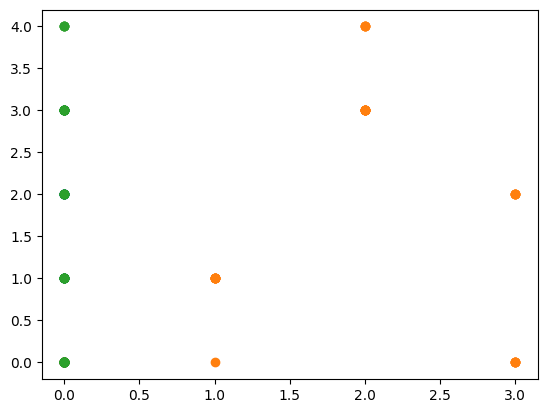

In [98]:
plt.scatter(p,q)
plt.scatter(q,r)
plt.scatter(p,r)
plt.show()

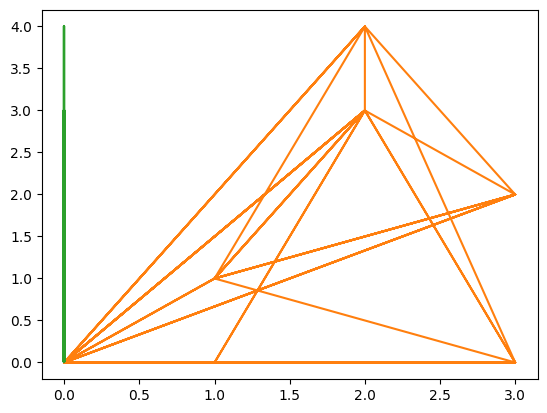

In [99]:
plt.plot(p,q)
plt.plot(q,r)
plt.plot(p,r)
plt.show()

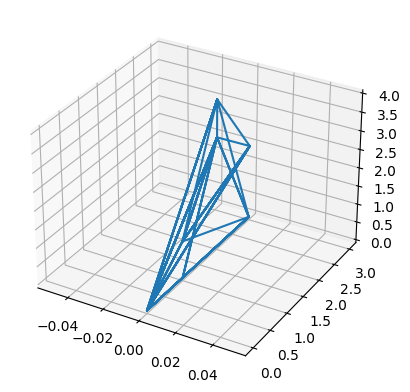

In [100]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot(p,q,r)
plt.show()

### Inferences:

#### In clusters column there is outiers/extreme values exists in the given data shows with -1.